# HW1 - Classifiers

In [1]:
# import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## 1. Digit Recognizer

In [5]:
# import libraries
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

#### (a)

In [2]:
# read training and testing data
training_data=pd.read_csv("Digit_Recognition_Data/train.csv")
testing_data=pd.read_csv("Digit_Recognition_Data/test.csv")

In [3]:
labels=training_data['label'].values # extract label values
data = training_data.drop(['label'],axis=1).values # extract data values
data_shaped = data.reshape(-1,28,28) # shape data for display

#### (b)

In [5]:
# function to display the MNIST digit indicated by the label parameter
def findDigit(label, data):
    digitIndex = list(labels).index(label)
    return data[digitIndex,:,:], digitIndex

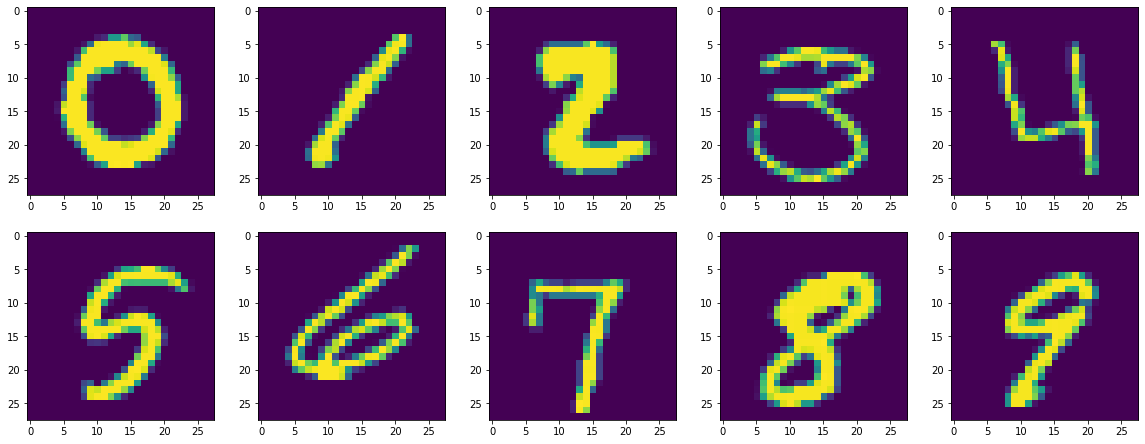

In [6]:
# plot one of each MNIST digit
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    digit, indx = findDigit(i, data_shaped)
    imshow(digit) # display digit on screen
    
plt.savefig('MNIST_Digits.png') # save output figure for report

#### (c)

In [8]:
# function to calculate the prior probability of the class indicated by the label parameter
def calculatePrior(label):
    return np.count_nonzero(labels == label)/(42000)

Prior probability for  0 :  0.09838095238095237
Prior probability for  1 :  0.11152380952380953
Prior probability for  2 :  0.09945238095238096
Prior probability for  3 :  0.1035952380952381
Prior probability for  4 :  0.09695238095238096
Prior probability for  5 :  0.09035714285714286
Prior probability for  6 :  0.0985
Prior probability for  7 :  0.10478571428571429
Prior probability for  8 :  0.09673809523809523
Prior probability for  9 :  0.09971428571428571


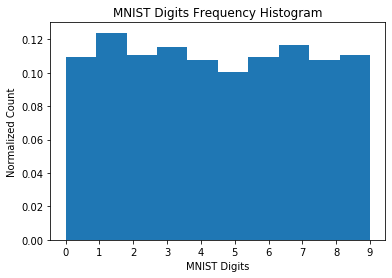

In [21]:
# print the prior probability for each MNIST digit
for i in range(10):
    print ("Prior probability for ", i, ": ", calculatePrior(i))

# plot a histogram of the labels, density = True is for normalization
plt.hist(labels, bins = 10, density = True)
plt.xticks(np.arange(10), ['0','1','2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('MNIST Digits Frequency Histogram')
plt.xlabel('MNIST Digits') # label x axis
plt.ylabel('Normalized Count') # label y axis
plt.savefig('Count_Hist.png') # save figure for the report
plt.show()

#### (d)

In [25]:
# function to calculate the Euclidean or L2 norm distance
def euclideanDist(img1, img2):
    return np.linalg.norm(img2-img1)

In [34]:
# find one of each digit
listofDigits = [findDigit(i, data_shaped) for i in range(10)]

# separate list of digits and their indices
digits = []
dig_indxs = []
for digitTuple in listofDigits:
    digits.append(digitTuple[0])
    dig_indxs.append(digitTuple[1])

In [35]:
# find nearest neighbor to each digit
# create a list of nearest neighbors to each example digit, where the example digits are the same ones printed before
nearest_neighbors = []

# loop through every digit 
for i, digit in enumerate(digits):
    indx = dig_indxs[i] # find digit index
    
    # loop through all digit images
    for j, img in enumerate(data_shaped):
        # skip the image that we are finding the nearest neighbor for
        if j == indx:
            continue
        # calculate distance
        dist = euclideanDist(np.array(digit), np.array(img))
        # update best distance
        if j == 0:
            best_dist = dist
            nearest_n = img
            best_indx = j
        else:
            if dist < best_dist:
                best_dist = dist
                nearest_n = img
                best_indx = j
    nearest_neighbors.append((nearest_n, best_indx)) # add to nearest neighbors list

The nearest neighbor for the image selected for 0 is at index 12950
The nearest neighbor for the image selected for 1 is at index 29704
The nearest neighbor for the image selected for 2 is at index 9536
* The nearest neighbor for the image selected for 3 is at index 8981
The nearest neighbor for the image selected for 4 is at index 14787
The nearest neighbor for the image selected for 5 is at index 30073
The nearest neighbor for the image selected for 6 is at index 16240
The nearest neighbor for the image selected for 7 is at index 15275
The nearest neighbor for the image selected for 8 is at index 32586
The nearest neighbor for the image selected for 9 is at index 35742


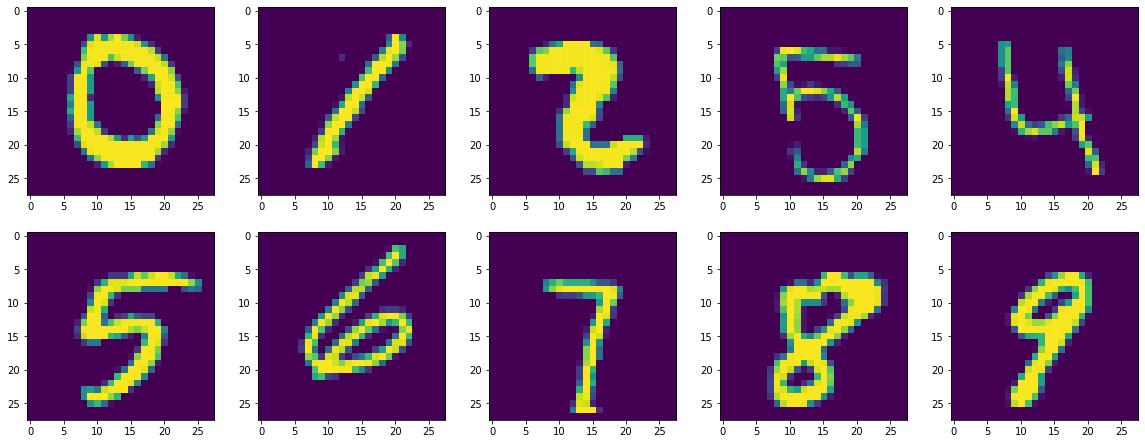

In [36]:
# display nearest neighbor and print distance between it and the original digit image
plt.figure(figsize=(20,20))

for i, neighbor in enumerate(nearest_neighbors):
    neighbor, indx = neighbor
    if i != labels[indx]:
        print('*', end = ' ')
    print('The nearest neighbor for the image selected for', i, 'is at index', indx)
    plt.subplot(5,5,i+1)
    imshow(neighbor)
    
plt.savefig('Matches.png') # save figure for report

#### (e)

In [26]:
zerosIndexes = [] # list to store the indexes of all the '0' digits
onesIndexes = [] # list to store the indexes of all the '1' digits

for i, label in enumerate(labels):
    if label == 0: # if it is a '0' store in list for zeros
        zerosIndexes.append(i)
    elif label == 1: # if it is a '1' store in list for ones
        onesIndexes.append(i)

In [27]:
distZeros = [] # list to store distances between all '0', or genuine '0', pairs

for indx, i in enumerate(zerosIndexes): 
    for j in zerosIndexes[indx+1:]: 
        distZeros.append(euclideanDist(data[i], data[j]))

In [28]:
distOnes = [] # list to store distances between all '1', or genuine '1', pairs

for indx,i in enumerate(onesIndexes): 
    for j in onesIndexes[indx+1:]: 
        distOnes.append(euclideanDist(data[i], data[j]))

In [29]:
distImposters = [] # list to store distances between all '0'-'1', or impostor, pairs

for indx,i in enumerate(zerosIndexes): 
    for j in onesIndexes[indx+1:]: 
        distImposters.append(euclideanDist(data[i], data[j]))

for indx,i in enumerate(onesIndexes): 
    for j in zerosIndexes[indx+1:]: 
        distImposters.append(euclideanDist(data[i], data[j]))

In [30]:
distGenuine = distZeros + distOnes # merge genuine distance lists for '0's and '1's

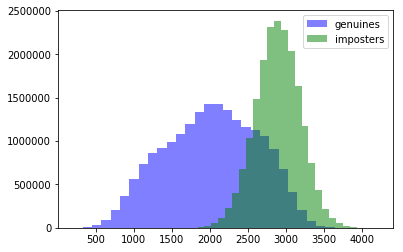

In [31]:
# plot histogram of genuine and impostor pairwise distances
plt.hist(distGenuine, color = 'b', label = 'genuines', bins = 32, alpha = 0.5)
plt.hist(distImposters, color = 'g', label = 'imposters', bins = 32, alpha = 0.5)
plt.xlabel('Distance') # label x axis
plt.ylabel('Counts') # label y axis
plt.legend() # add legent
plt.savefig('Gen_Imp_Hist.png') # save figure for report

In [19]:
max(distGenuine + distImposters) # check maximum distance

4202.085553626913

#### (f)

In [37]:
ROCPointsX = [] # list to store the X coordinate of points in the ROC curve
ROCPointsY = [] # list to store the Y coordinate of points in the ROC curve
distTotal = distGenuine + distImposters # merge genuine and impostor distances into a single list

# calculate each ROC curve point
for j in range(0, math.ceil(max(distTotal)), 250):
    # FP, TN, FN, and TP are defined differently because instead of distributions of 0 and 1
    # we are given distributions of genuine and imposter
    # We are determining if we are correctly classifying into the genuine or imposter distribution
    # as opposed to determining if we are correctly classifying into 0 or 1
    
    # FPs are the stuff that is classified incorrectly as positive
    # These are the items that have a high distance compared to the threshold but are incorrectly
        # placed in the genuine distribution
    FP = sum(i > j for i in distGenuine) 
    
    # TNs are the stuff that is classified correctly as negative
    # The TNs are the items in the genuine distribution that are correctly below the distance threshold
    TN = sum(i < j for i in distGenuine) 
    
    # FNs are the stuff that is classified incorrectly as negative
    # These are the items that have a low distance compared to the threshold but are incorrectly
        # placed in the imposter distribution
    FN = sum(i < j for i in distImposters) 
    
    # TPs are the stuff that is classified correctly as positive
    # These are the items that have high distance compared to the threshold and are correctly 
        # put in the imposter distribution
    TP = sum(i > j for i in distImposters) 

    TPR = TP / (TP + FN) # calculate True Positive Rate for each threshold in the loop
    FPR = FP / (FP + TN) # calculate False Positive Rate for each threshold in the loop
    
    ROCPointsY.append(TPR) # add TPR value to list
    ROCPointsX.append(FPR) # add FPR value to list

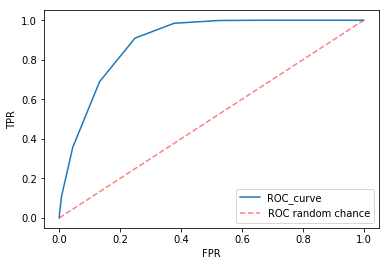

In [38]:
# plot ROC curve
plt.plot(ROCPointsX, ROCPointsY, label='ROC_curve')
x = np.linspace(0,1,100)
# plot random chance for comparison
plt.plot(x, x, color='r', linestyle='dashed', alpha = 0.5, label='ROC random chance')
plt.xlabel("FPR") # label x axis
plt.ylabel("TPR") # label y axis
plt.legend() # add legend
plt.savefig('ROC_curve.png'); # save figure for report

##### Determine EER

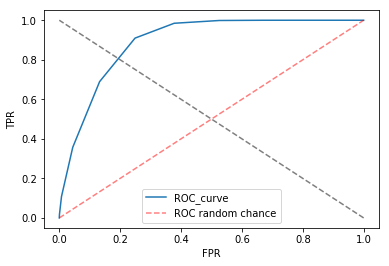

In [48]:
# plot EER
plt.plot(ROCPointsX, ROCPointsY, label='ROC_curve')
EER_find = -np.array(ROCPointsX)+1
plt.plot(ROCPointsX, EER_find, color='k', linestyle='dashed', alpha = 0.5)
plt.plot(x, x, color='r', linestyle='dashed', alpha = 0.5, label='ROC random chance')
plt.xlabel("FPR") # label x axis
plt.ylabel("TPR") # label y axis
plt.legend() # add legend

In [50]:
# check the ROC curve results are as expected
print(ROCPointsX)
print(np.array(ROCPointsY)-EER_find)
print(ROCPointsX[10])
print(ROCPointsX[11])

[1.0, 0.9999998974476357, 0.9993574068855299, 0.9896705151323456, 0.9518106415619834, 0.8758960000065633, 0.7791968918426252, 0.6656127871332042, 0.525614020838336, 0.3775167250104219, 0.2488927548853257, 0.1324480705593083, 0.044194584711872195, 0.0072192762346381684, 0.0005336312274410437, 2.63046814333867e-05, 4.1020945705086476e-07]
[ 1.          0.9999999   0.99935741  0.98967052  0.95181064  0.875896
  0.7791957   0.66554095  0.52436504  0.36224408  0.15849858 -0.1781554
 -0.59863742 -0.88471627 -0.98210129 -0.99835495 -0.99992579]
0.2488927548853257
0.1324480705593083


For the ROC curve We see that the curves intersect between points at index 10 and 11. This is between FPR = 0.24889 and FPR = 0.13245. Thus, the EER for the ROC Curve is between these values.

In [51]:
print('The EER for the ROC curve is', (ROCPointsX[10]+ROCPointsX[11])/2)

The EER for the ROC curve is 0.190670412722317


The EER for the random chance curve is 0.5.

#### (g)

In [22]:
# Function to go through all of the MNIST digits (nums) and check if it is a nearest neighbor 
# to "mynum" which is a test digit that we are trying to see if we can classify after
# spliting the training data set into a test set and train set. The nums are all of the MNIST
# numbers split into the training set, the labels are all of the labels corresponding to nums.
# Finally, k is the number of neighbors
def KNNclassify(mynum, nums, labels, k):

    # find nearest neighbors
    neighbors = []
    for i, num in enumerate(nums):
        # find distance of myitem to the item we are checking
        distance = euclideanDist(mynum, num)
        
        # start with the first k items in nums
        if len(neighbors) < k: 
            neighbors.append((distance, labels[i]))
            # sort in ascending order by distance
            neighbors = sorted(neighbors)
        
        # if the distance of this item is less than max distance replace max item with this one
        elif neighbors[len(neighbors)-1][0] > distance: 
            neighbors[len(neighbors)-1] = (distance, labels[i])
            # sort in ascending order by distance
            neighbors = sorted(neighbors)
    
    # need to determine where to classify based on the labels of the neighbors   
    # the classes are just 0-9, so we can represent in an array
    class_nums = np.zeros(10)
    for neighbor in neighbors:
        class_nums[neighbor[1]] += 1
    
    # determine the best classifications based on the dict created for the neighbors
    best_guess = np.argmax(class_nums)
                
    return best_guess # return the best match guess

In [23]:
# test our KNN classifier
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)

In [24]:
preds = [] # list to store our kNN classifier's predictions
for i, testnum in enumerate(x_test): # loop to add all the predictions to the list
    preds.append(KNNclassify(testnum, x_train, y_train, k = 3)) 

In [25]:
print('The accuracy of my KNN model is', accuracy_score(y_test, preds)) # print model accuracy

The accuracy of my KNN model is 0.9661904761904762


#### (h)

##### Do crossvalidation with 3-folds on our KNN classifier implementation with  k=3

In [29]:
# run our KNN classifier with crossvalidation
X = data 
Y = labels
cv = KFold(3)

# initialize lists to store the predictions, actual labels and accuracy
my_accuracy = []
my_predictions = []
my_actuals = []

# perform crossvalidation
for train, test in cv.split(X, Y):
    total = len(X[test])
    correct = 0
    # test all values in test data
    for i, testnum in enumerate(X[test]):
        best_guess = KNNclassify(testnum, X[train], Y[train], k = 3)
        my_predictions.append(best_guess)
        if best_guess == Y[test][i]: # check if the best_guess is the same as the label
            correct += 1
    # find the accuracy for this iteration
    my_accuracy.append((correct/total)*100)
    my_actuals += list(Y[test])

print('The average accuracy of a 3NN classifier after K-fold crossvalidation is ', np.mean(my_accuracy)) # print average accuracy

The average accuracy of a 3NN classifier after K-fold crossvalidation is  96.54285714285713


##### Do crossvalidation with 3 folds on the sklearn KNN classifier with k=5.

In [26]:
# run crossvalidation on sklearn's KNN classifier for comparison
X = data 
Y = labels
cv = KFold(3)

# initialize arrays for analysis
accuracy = []
predictions = []
actuals = []

# perform crossvalidation
for train, test in cv.split(X, Y):
    neighbors = KNeighborsClassifier(n_neighbors=5).fit(X[train], Y[train])
    predicted = neighbors.predict(X[test])
    accuracy.append(accuracy_score(Y[test], predicted))
    predictions += list(predicted)
    actuals += list(Y[test])

print('The average accuracy of a 5NN classifier after K-fold crossvalidation is ', np.mean(accuracy)) # print average accuracy

The average accuracy of a 3NN classifier after K-fold crossvalidation is  0.9642142857142857


The above should say "the average accuracy of a 5NN classifier"

#### (i)

##### Confusion matrix for our KNN implementation with k=3

[[4110    0    4    0    0    5   10    0    2    1]
 [   0 4658    8    1    2    1    4    7    1    2]
 [  31   48 3988   13    5    3    4   74    7    4]
 [   6   12   34 4202    0   39    2   21   18   17]
 [   3   45    1    0 3899    0   15    4    1  104]
 [  15    4    2   75    4 3618   43    2    5   27]
 [  26    7    0    0    5   17 4080    0    2    0]
 [   2   54   10    3   12    0    0 4268    0   52]
 [  24   50   25   68   19   76   17   11 3730   43]
 [  17   11    6   34   44   13    2   59    7 3995]]


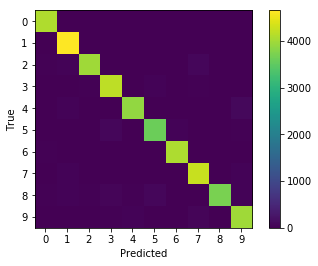

In [30]:
# create confusion matrix with predictions and actual values for our KNN classifier
confusion_m = confusion_matrix(my_actuals, my_predictions)
print(confusion_m)

# display the confusion_matrix in an intuitive way
fig, ax = plt.subplots()
imshow(confusion_m)
plt.colorbar()
classes = [0,1,2,3,4,5,6,7,8,9]
ax.set(xticks=classes,yticks=classes,xticklabels=classes,yticklabels=classes,ylabel='True',xlabel='Predicted');

##### Confusion matrix for sklearn KNN with k=5

[[4104    1    4    0    0    7   12    2    0    2]
 [   0 4660    9    2    1    0    2    7    1    2]
 [  34   59 3966   13    3    5    3   83    8    3]
 [   5   13   28 4193    0   43    1   24   24   20]
 [   2   50    0    0 3905    0   14    7    2   92]
 [  11    9    2   73    3 3619   48    3    4   23]
 [  26    7    1    0    4   17 4081    0    1    0]
 [   2   61   11    3   13    0    0 4265    0   46]
 [  19   50   20   77   22   79   20   13 3720   43]
 [  16   13    3   33   47   11    1   69   11 3984]]


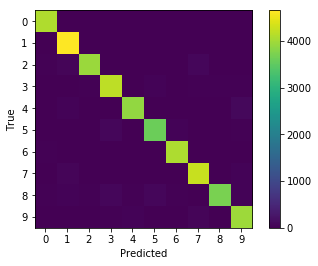

In [27]:
# create confusion matrix with predictions and actual values for sklearn's KNN classifier
confusion_m = confusion_matrix(actuals, predictions)
print(confusion_m)

# display the confusion matrix in an intuitive way
fig, ax = plt.subplots()
imshow(confusion_m)
plt.colorbar()
classes = [0,1,2,3,4,5,6,7,8,9]
ax.set(xticks=classes,yticks=classes,xticklabels=classes,yticklabels=classes,ylabel='True',xlabel='Predicted');

#### (j)

In [6]:
all_predictions = [] # list to store predictions
for i, testnum in enumerate(testing_data.values):
    all_predictions.append(KNNclassify(testnum, data, labels, k = 3)) # add classifier predictions to list

NameError: name 'testing_data' is not defined

In [33]:
# create and save all predictions to file
all_pred_df = pd.DataFrame(all_predictions)
all_pred_df.to_csv('prediction_data/MNIST_submission_Simi_Eva.csv')

In [22]:
# create and save .csv file to submit to Kaggle
ImageIDs = [str(i) for i in range(1, 28001)]
digit_preds = pd.read_csv('prediction_data/MNIST_submission_Simi_Eva.csv')
digit_preds = digit_preds.drop(["Unnamed: 0"], axis=1).rename(columns={'0':'Label'})
digit_preds.insert(0, 'ImageId', ImageIDs)
digit_preds.to_csv('submission_data/MNIST_formatted_submission_Simi_Eva.csv', index=False)

## 2. The Titanic Disaster

#### (a)

In [2]:
# import libraries
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [3]:
# read training and testing data
training_data_t=pd.read_csv("Titanic_Data/train_titanic.csv")
testing_data_t=pd.read_csv("Titanic_Data/test_titanic.csv")
labels_t=training_data_t['Survived'].values # extract data labels

#### (b)

In [4]:
# check for missing data to identify irrelevant columns
training_data_t.info() # check missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# code to check NaN values in dataset and decide which features are relevant to build our LR model
count = 0
for i in training_data_t['Cabin'].values: # calculate and print the percentage of NaN values for the 'Cabin' feature
    if i != i:
        count+=1
percent_nan = count/(len(training_data_t['Cabin'].values))
print(percent_nan*100, '% of people have NaN for their cabin')

count = 0
for i in training_data_t['Age'].values: # calculate and print the percentage of NaN values for the 'Age' feature
    if i != i:
        count+=1
percent_nan = count/(len(training_data_t['Age'].values))
print(percent_nan*100, '% of people have NaN for their age')

77.10437710437711 % of people have NaN for their cabin
19.865319865319865 % of people have NaN for their age


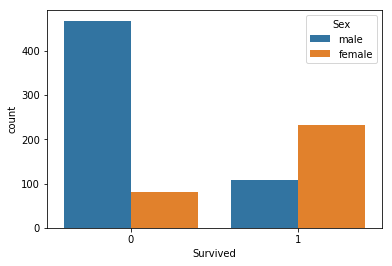

In [6]:
sns.countplot(data=training_data_t, x='Survived', hue='Sex',) # check people who survived according to sex

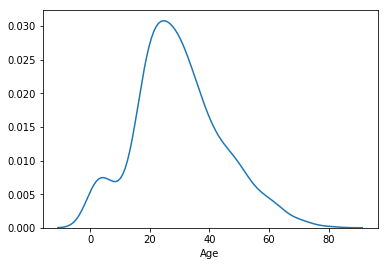

In [7]:
sns.distplot(training_data_t['Age'].dropna(), hist=False, bins=40) # check people who survived according to age

We can ignore PassengerId and Name for the analysis because these are just identifying factors for the person. We will only use PassengerId after the analysis to label the survivers. Can also ignore Cabin because 77% of values in cabin are NaN. Since the tickets all have different numbers, and the passengers are grouped according to Pclass, not Ticket, we can drop the Tciket column.

From the above analysis we can see that the number of males that survived almost doubles the number of females who survived, therefore this feature is significant in our analysis. We can also see that most of the people who survived were young adults.

In [8]:
# convert sex and embarked variables in numerical data
sexDummies = pd.get_dummies(training_data_t['Sex'], drop_first = True)
embarkedDummies = pd.get_dummies(training_data_t['Embarked'], drop_first = True)

# extract passengerIds for later use
passengerIds = training_data_t['PassengerId']

# remove uneeded data and categorical data
training_data_t_clean = training_data_t.drop(['Sex', 'Name', 'Cabin', 'Ticket', 'Embarked', 'PassengerId'],axis=1) #change to not drop embarked

# add back the categorical data that was made numeric
training_data_t_clean = pd.concat([training_data_t_clean,sexDummies, embarkedDummies],axis=1)

# for people with age that is NaN value, replace their age with the mean age of the dataset
training_data_t_clean['Age'].fillna((training_data_t_clean['Age'].mean()), inplace=True)

# view what we have
training_data_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [9]:
# split data into test and train set for testing
x_train, x_test, y_train, y_test = train_test_split(training_data_t_clean.drop('Survived', axis=1), 
           training_data_t_clean['Survived'], test_size=0.25)

In [10]:
# perform logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
Ps = lr.predict(x_test) # store predictions

The accuracy of our model is 82.95964125560538
[[122  13]
 [ 25  63]]


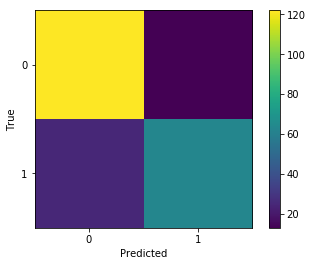

In [12]:
# understand accuracy
conf_matrix = confusion_matrix(y_test, Ps)

print('The accuracy of our model is',((accuracy_score(y_test, Ps))*100))
print(conf_matrix)

# display the confusion matrix in an intuitive way
fig, ax = plt.subplots()
imshow(conf_matrix)
plt.colorbar()
classes = [0,1]
ax.set(xticks=classes,yticks=classes,xticklabels=classes,yticklabels=classes,ylabel='True',xlabel='Predicted');

#### (c)

##### Clean Test Data

In [13]:
# check missing data
testing_data_t.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
# convert sex and embarked variables in numerical data
sexDummiestest = pd.get_dummies(testing_data_t['Sex'], drop_first = True)
embarkedDummiestest = pd.get_dummies(testing_data_t['Embarked'], drop_first = True)

# extract passengerIds for later use
passengerIdstest = testing_data_t['PassengerId']

# remove uneeded data and categorical data
testing_data_t_clean = testing_data_t.drop(['Sex', 'Name', 'Cabin', 'Ticket', 'Embarked', 'PassengerId'],axis=1) #change to not drop embarked

# add back the categorical data that was made numeric
testing_data_t_clean = pd.concat([testing_data_t_clean, sexDummiestest, embarkedDummiestest],axis=1)

# for people with age that is NaN value, replace their age with the mean age of the dataset
testing_data_t_clean['Age'].fillna((testing_data_t_clean['Age'].mean()), inplace=True)

# for people with fare that is NaN value, replace their fare with the mean age of the dataset
testing_data_t_clean['Fare'].fillna((testing_data_t_clean['Fare'].mean()), inplace=True)

# view what we have
testing_data_t_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [15]:
# still need to run
full_lr = LogisticRegression().fit(training_data_t_clean.drop('Survived', axis=1), 
                                   training_data_t_clean['Survived'])
preds = full_lr.predict(testing_data_t_clean)

In [16]:
# create and save .csv file to submit to Kaggle
all_pred_df = pd.DataFrame(list(zip(passengerIdstest,preds)), columns =['PassengerId','Survived'])
all_pred_df.to_csv('submission_data/Titanic_formatted_submission_Simi_Eva.csv', index=False) 